# Лабораторная 2

### Вариант 21 (6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
C = np.array([
    [6, 18, 6],
    [17, 8, 18],
    [16, 10, 10],
])

## Аналитическое решение

In [4]:
u = np.ones(C.shape[0])

In [5]:
C_inv = np.linalg.inv(C)

In [6]:
x = np.dot(u, C_inv) / np.dot(np.dot(u, C_inv), u.T)
x

array([0.41666667, 0.5       , 0.08333333])

In [7]:
y = np.dot(C_inv, u.T) / np.dot(np.dot(u, C_inv), u.T)
y

array([0.38888889, 0.52777778, 0.08333333])

In [8]:
v = 1/np.dot(np.dot(u, C_inv), u.T)
v

12.333333333333329

## Метод Брауна-Робинсона

In [9]:
x_strat_id, y_strat_id = np.random.randint(C.shape[0]), np.random.randint(C.shape[1])

In [10]:
df = pd.DataFrame(
    [[
        x_strat_id, 
        y_strat_id, 
        *C[:, y_strat_id], 
        *C[x_strat_id, :], 
        C[:, y_strat_id].max(), 
        C[x_strat_id, :].min(), 
        C[:, y_strat_id].max() - C[x_strat_id, :].min()
    ]], 
    columns=['A', 'B', 'x1', 'x2', 'x3', 'y1', 'y2', 'y3', 'high', 'low', 'e']
)

In [11]:
while df.loc[df.index[-1],'e'] > 0.1:
    x_costs = df.loc[df.index[-1],'x1':'x3']
    y_costs = df.loc[df.index[-1],'y1':'y3']
    
    x_strat_id = x_costs.index.get_loc((np.random.choice(x_costs.index[x_costs == x_costs.values.max()])))
    
    y_strat_id = y_costs.index.get_loc((np.random.choice(y_costs.index[y_costs == y_costs.values.min()])))

    df = df.append(
        pd.DataFrame(
            [[
                x_strat_id, 
                y_strat_id, 
                *(C[:, y_strat_id] + df.loc[df.index[-1],'x1':'x3']), 
                *(C[x_strat_id, :] + df.loc[df.index[-1],'y1':'y3'])
            ]], 
            columns=['A', 'B', 'x1', 'x2', 'x3', 'y1', 'y2', 'y3'], 
        ),
        ignore_index=True
    )

    df.loc[df.index[-1],'high'] = df.loc[df.index[-1], 'x1':'x3'].max() / df.shape[0]
    df.loc[df.index[-1],'low'] = df.loc[df.index[-1], 'y1':'y3'].min() / df.shape[0]
    df.loc[df.index[-1],'e'] = df['high'].min() - df['low'].max()

In [12]:
df

A  B     x1     x2     x3     y1     y2     y3       high        low  \
0   0  1   18.0    8.0   10.0    6.0   18.0    6.0  18.000000   6.000000   
1   0  0   24.0   25.0   26.0   12.0   36.0   12.0  13.000000   6.000000   
2   2  2   30.0   43.0   36.0   28.0   46.0   22.0  14.333333   7.333333   
3   1  2   36.0   61.0   46.0   45.0   54.0   40.0  15.250000  10.000000   
4   1  2   42.0   79.0   56.0   62.0   62.0   58.0  15.800000  11.600000   
5   1  2   48.0   97.0   66.0   79.0   70.0   76.0  16.166667  11.666667   
6   1  1   66.0  105.0   76.0   96.0   78.0   94.0  15.000000  11.142857   
7   1  1   84.0  113.0   86.0  113.0   86.0  112.0  14.125000  10.750000   
8   1  1  102.0  121.0   96.0  130.0   94.0  130.0  13.444444  10.444444   
9   1  1  120.0  129.0  106.0  147.0  102.0  148.0  12.900000  10.200000   
10  1  1  138.0  137.0  116.0  164.0  110.0  166.0  12.545455  10.000000   
11  0  1  156.0  145.0  126.0  170.0  128.0  172.0  13.000000  10.666667   
12  0  1  174.0  153.0  136.0  176.0  146.0  178.0  13.384615  11.230769   
13  0  1  192.0  161.0  146.0  182.0  164.0  184.0  13.714286  11.714286   
14  0  1  210.0  169.0  156.0  188.0  182.0  190.0  14.000000  12.133333   
15  0  1  228.0  177.0  166.0  194.0  200.0  196.0  14.250000  12.125000   
16  0  0  234.0  194.0  182.0  200.0  218.0  202.0  13.764706  11.764706   
17  0  0  240.0  211.0  198.0  206.0  236.0  208.0  13.333333  11.444444   
18  0  0  246.0  228.0  214.0  212.0  254.0  214.0  12.947368  11.157895   
19  0  0  252.0  245.0  230.0  218.0  272.0  220.0  12.600000  10.900000   
20  0  0  258.0  262.0  246.0  224.0  290.0  226.0  12.476190  10.666667   
21  1  0  264.0  279.0  262.0  241.0  298.0  244.0  12.681818  10.954545   
22  1  0  270.0  296.0  278.0  258.0  306.0  262.0  12.869565  11.217391   
23  1  0  276.0  313.0  294.0  275.0  314.0  280.0  13.041667  11.458333   
24  1  0  282.0  330.0  310.0  292.0  322.0  298.0  13.200000  11.680000   
25  1  0  288.0  347.0  326.0  309.0  330.0  316.0  13.346154  11.884615   
26  1  0  294.0  364.0  342.0  326.0  338.0  334.0  13.481481  12.074074   
27  1  0  300.0  381.0  358.0  343.0  346.0  352.0  13.607143  12.250000   
28  1  0  306.0  398.0  374.0  360.0  354.0  370.0  13.724138  12.206897   
29  1  1  324.0  406.0  384.0  377.0  362.0  388.0  13.533333  12.066667   
30  1  1  342.0  414.0  394.0  394.0  370.0  406.0  13.354839  11.935484   
31  1  1  360.0  422.0  404.0  411.0  378.0  424.0  13.187500  11.812500   
32  1  1  378.0  430.0  414.0  428.0  386.0  442.0  13.030303  11.696970   
33  1  1  396.0  438.0  424.0  445.0  394.0  460.0  12.882353  11.588235   
34  1  1  414.0  446.0  434.0  462.0  402.0  478.0  12.742857  11.485714   
35  1  1  432.0  454.0  444.0  479.0  410.0  496.0  12.611111  11.388889   
36  1  1  450.0  462.0  454.0  496.0  418.0  514.0  12.486486  11.297297   
37  1  1  468.0  470.0  464.0  513.0  426.0  532.0  12.368421  11.210526   
38  1  1  486.0  478.0  474.0  530.0  434.0  550.0  12.461538  11.128205   
39  0  1  504.0  486.0  484.0  536.0  452.0  556.0  12.600000  11.300000   
40  0  1  522.0  494.0  494.0  542.0  470.0  562.0  12.731707  11.463415   
41  0  1  540.0  502.0  504.0  548.0  488.0  568.0  12.857143  11.619048   
42  0  1  558.0  510.0  514.0  554.0  506.0  574.0  12.976744  11.767442   
43  0  1  576.0  518.0  524.0  560.0  524.0  580.0  13.090909  11.909091   
44  0  1  594.0  526.0  534.0  566.0  542.0  586.0  13.200000  12.044444   
45  0  1  612.0  534.0  544.0  572.0  560.0  592.0  13.304348  12.173913   
46  0  1  630.0  542.0  554.0  578.0  578.0  598.0  13.404255  12.297872   

            e  
0   12.000000  
1    7.000000  
2    5.666667  
3    3.000000  
4    1.400000  
5    1.333333  
6    1.333333  
7    1.333333  
8    1.333333  
9    1.233333  
10   0.878788  
11   0.878788  
12   0.878788  
13   0.831169  
14   0.412121  
15   0.412121  
16   0.412121  
17   0.412121  
18   0.412121  
19   0.412121  
20   0.342857  
21 

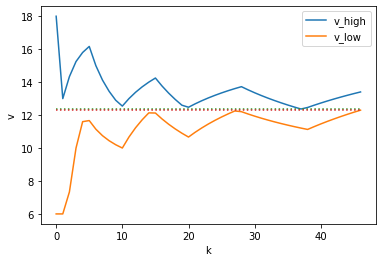

In [23]:
plt.plot(df.index, df['high'], label='v_high')
plt.plot(df.index, df['low'], label='v_low')
plt.plot(df.index, [df['high'].min()]*df.shape[0], linestyle=':')
plt.plot(df.index, [df['low'].max()]*df.shape[0], linestyle=':')
plt.xlabel('k')
plt.ylabel('v')
plt.legend()
plt.savefig('v')
plt.show()

In [14]:
def get_counts(col, target):
    return np.array([(df[col] == i).sum() for i in target])

In [15]:
x, y = get_counts('A', range(C.shape[0])), get_counts('B', range(C.shape[1]))

In [16]:
x / df.shape[0]

array([0.42553191, 0.55319149, 0.0212766 ])

In [17]:
y / df.shape[0]

array([0.29787234, 0.61702128, 0.08510638])

In [19]:
print([df['high'].min(),df['low'].max()])
v = np.average([df['high'].min(),df['low'].max()])
v

[12.368421052631579, 12.297872340425531]


12.333146696528555